# German Credit Dataset

## 1. Preprocessing

In [1]:
from pathlib import Path
import pandas as pd
# adjust path if the CSV is in a different location
csv_path = Path("GermanCredit.csv")
df = pd.read_csv(csv_path)

# quick check
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [23]:
# CELL 1. Drop the 3 columns that contribute the least to the dataset.
def drop_top_none_columns(dataframe, n=3, none_token="none"):
    """Return a copy of the DataFrame with the top-n 'none'-heavy columns removed."""
    normalized = dataframe.apply(lambda col: col.astype(str).str.strip().str.lower())
    none_counts = normalized.eq(none_token).sum()

    column_order = {column: idx for idx, column in enumerate(dataframe.columns)}
    stats = (
        none_counts[none_counts > 0]
        .rename("none_count")
        .to_frame()
        .assign(column_index=lambda s: s.index.map(column_order.get))
        .sort_values(["none_count", "column_index"], ascending=[False, True])
    )

    columns_to_drop = stats.head(n).index.tolist()
    updated_df = dataframe.drop(columns=columns_to_drop, errors="ignore")

    return updated_df, columns_to_drop, stats



df_original = df.copy()

df, dropped_columns, none_stats = drop_top_none_columns(df, n=3)

print("Columns ranked by 'none' frequency (descending):")
display(none_stats)
print(f"\nDropped columns ({len(dropped_columns)}): {dropped_columns}")

df.head()

Columns ranked by 'none' frequency (descending):


,none_count,column_index



Dropped columns (0): []


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0


In [24]:
### CELL: 2. Remove unnecessary apostrophes from all string columns

# remove apostrophes from every string cell in the dataframe
df = df.apply(lambda col: col.astype(str).str.replace("'", "", regex=False))

print("Apostrophes removed from all string columns.")
display(df.head())


Apostrophes removed from all string columns.


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0


In [25]:
### CELL: 3. Recode checking_status categories

# define mapping from original → new categories
mapping = {
    "no checking": "No Checking",
    "<0": "Low",
    "0<=x<200": "Medium",
    ">=200": "High"
}

# normalize values to lowercase first to avoid mismatch
df["checking_status"] = df["checking_status"].str.strip().str.lower().map(mapping)

print("checking_status column successfully recoded.")
display(df["checking_status"].value_counts())
display(df.head())


checking_status column successfully recoded.


checking_status
No Checking    394
Name: count, dtype: int64

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,NaN,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,NaN,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,NaN,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,NaN,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0


In [7]:
### CELL: Recode savings_status categories

# define mapping from original → new categories
savings_mapping = {
    "no known savings": "No Savings",
    "<100": "Low",
    "100<=x<500": "Medium",
    "500<=x<1000": "High",
    ">=1000": "High"
}

# normalize before mapping to avoid mismatches
df["savings_status"] = df["savings_status"].str.strip().str.lower().map(savings_mapping)

print("savings_status column successfully recoded.")
display(df["savings_status"].value_counts())
display(df.head())


savings_status column successfully recoded.


savings_status
Low           603
No Savings    183
High          111
Medium        103
Name: count, dtype: int64

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad


In [26]:
### CELL: 4. Recode class column to numeric

# mapping from original → numeric
class_mapping = {
    "good": 1,
    "bad": 0
}

# normalize first to avoid mismatch
df["class"] = df["class"].str.strip().str.lower().map(class_mapping)

print("class column successfully recoded to numeric (good → 1, bad → 0).")
display(df["class"].value_counts())
display(df.head())


class column successfully recoded to numeric (good → 1, bad → 0).


Series([], Name: count, dtype: int64)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,NaN,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,NaN
1,NaN,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,NaN
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,NaN
3,NaN,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,NaN
4,NaN,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,NaN


In [27]:
### CELL: 5. Recode employment column into experience levels

employment_mapping = {
    "unemployed": "Unemployed",
    "<1": "Amateur",
    "1<=x<4": "Professional",
    "4<=x<7": "Experienced",
    ">=7": "Expert"
}

# normalize before mapping to avoid mismatches
df["employment"] = df["employment"].str.strip().str.lower().map(employment_mapping)

print("employment column successfully recoded.")
display(df["employment"].value_counts())
display(df.head())

employment column successfully recoded.


employment
Unemployed    62
Name: count, dtype: int64

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,NaN,6,critical/other existing credit,radio/tv,1169,No Savings,NaN,4,male single,4,real estate,67,own,2,skilled,1,yes,NaN
1,NaN,48,existing paid,radio/tv,5951,Low,NaN,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,NaN
2,No Checking,12,critical/other existing credit,education,2096,Low,NaN,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,NaN
3,NaN,42,existing paid,furniture/equipment,7882,Low,NaN,2,male single,4,life insurance,45,for free,1,skilled,2,yes,NaN
4,NaN,24,delayed previously,new car,4870,Low,NaN,3,male single,4,no known property,53,for free,2,skilled,2,yes,NaN


## 2. Analysis


In [10]:
### CELL: 1a. Crosstab of foreign_worker vs class

# crosstab showing counts of each foreign worker category per credit class
crosstab_fw_class = pd.crosstab(df["foreign_worker"], df["class"])

print("Counts of foreign worker categories across credit class:")
display(crosstab_fw_class)


Counts of foreign worker categories across credit class:


class,0,1
foreign_worker,,
no,4,33
yes,296,667


In [11]:
### CELL: 1b. Crosstab of employment vs savings_status

crosstab_emp_save = pd.crosstab(df["employment"], df["savings_status"])

print("Counts of each employment category across savings_status categories:")
display(crosstab_emp_save)


Counts of each employment category across savings_status categories:


savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


In [15]:
### CELL: 2. Fix credit_amount type and compute average for single males (Experienced)

# ensure credit_amount is numeric
df["credit_amount"] = pd.to_numeric(df["credit_amount"], errors="coerce")

# filter single males with 4–7 years of employment (mapped to "Experienced")
subset = df[
    (df["personal_status"].str.contains("male", case=False, na=False)) &
    (df["personal_status"].str.contains("single", case=False, na=False)) &
    (df["employment"] == "Experienced")
]

average_credit_amount = subset["credit_amount"].mean()

print("Average credit_amount of single males with 4–7 years of employment:")
average_credit_amount


Average credit_amount of single males with 4–7 years of employment:


4142.592592592592

In [17]:
### CELL: 3. Average credit duration for each employment (job) type

# ensure duration is numeric (in case it was converted to string earlier)
df["duration"] = pd.to_numeric(df["duration"], errors="coerce")

avg_duration_by_job = df.groupby("employment")["duration"].mean()

print("Average credit duration for each employment type:")
display(avg_duration_by_job)


Average credit duration for each employment type:


employment
Amateur         19.401163
Experienced     22.994253
Expert          21.264822
Professional    20.365782
Unemployed      20.661290
Name: duration, dtype: float64

In [18]:
### CELL: 4. Most common checking_status and savings_status for purpose = 'education'

# filter rows where purpose is "education"
edu_df = df[df["purpose"].str.contains("education", case=False, na=False)]

# find the most common checking_status
most_common_checking = edu_df["checking_status"].mode()[0]

# find the most common savings_status
most_common_savings = edu_df["savings_status"].mode()[0]

print(f"Most common checking status: {most_common_checking}")
print(f"Most common savings status: {most_common_savings}")


Most common checking status: No Checking
Most common savings status: Low


## 3. Visualization

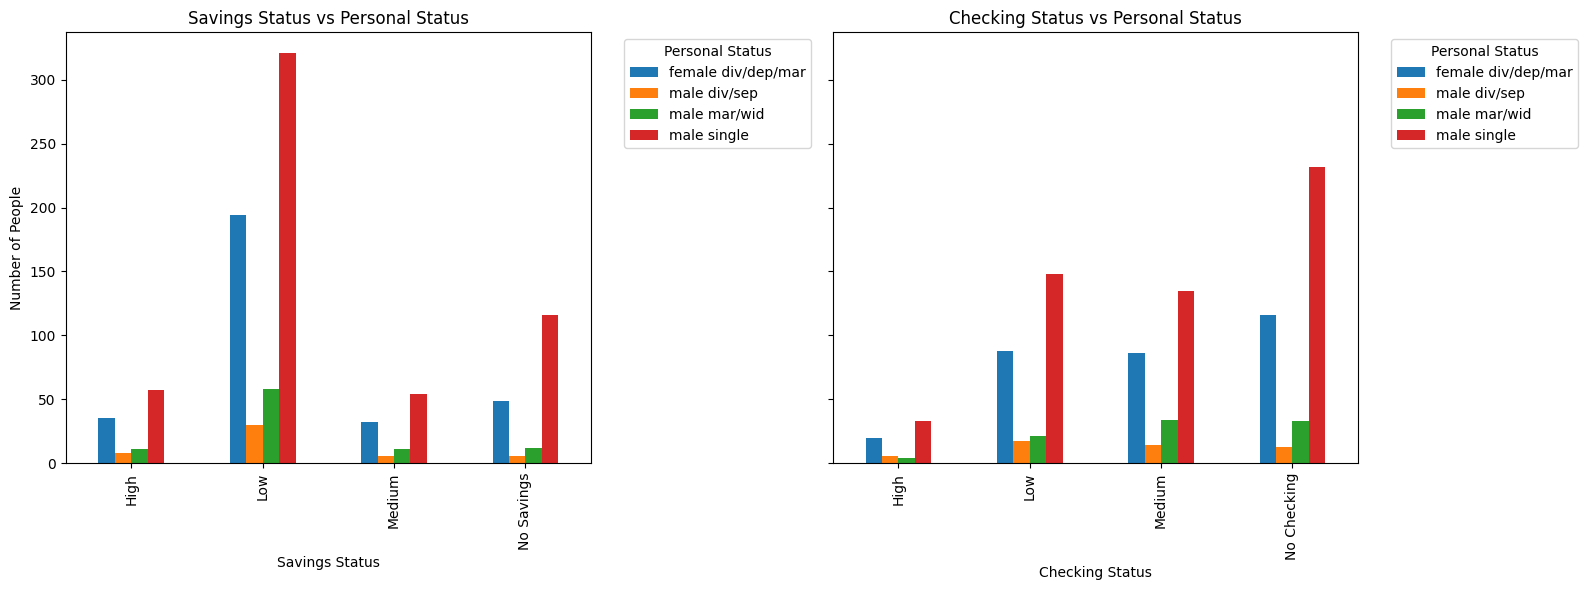

In [20]:
### CELL: 1. Subplots — Bar charts for savings_status and checking_status vs personal_status

import matplotlib.pyplot as plt

# Create cross-tabulations
ct_savings = pd.crosstab(df["savings_status"], df["personal_status"])
ct_checking = pd.crosstab(df["checking_status"], df["personal_status"])

# Plot setup
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Bar chart 1 — savings_status vs personal_status
ct_savings.plot(kind="bar", ax=axes[0])
axes[0].set_title("Savings Status vs Personal Status")
axes[0].set_xlabel("Savings Status")
axes[0].set_ylabel("Number of People")
axes[0].legend(title="Personal Status", bbox_to_anchor=(1.05, 1), loc="upper left")

# Bar chart 2 — checking_status vs personal_status
ct_checking.plot(kind="bar", ax=axes[1])
axes[1].set_title("Checking Status vs Personal Status")
axes[1].set_xlabel("Checking Status")
axes[1].legend(title="Personal Status", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


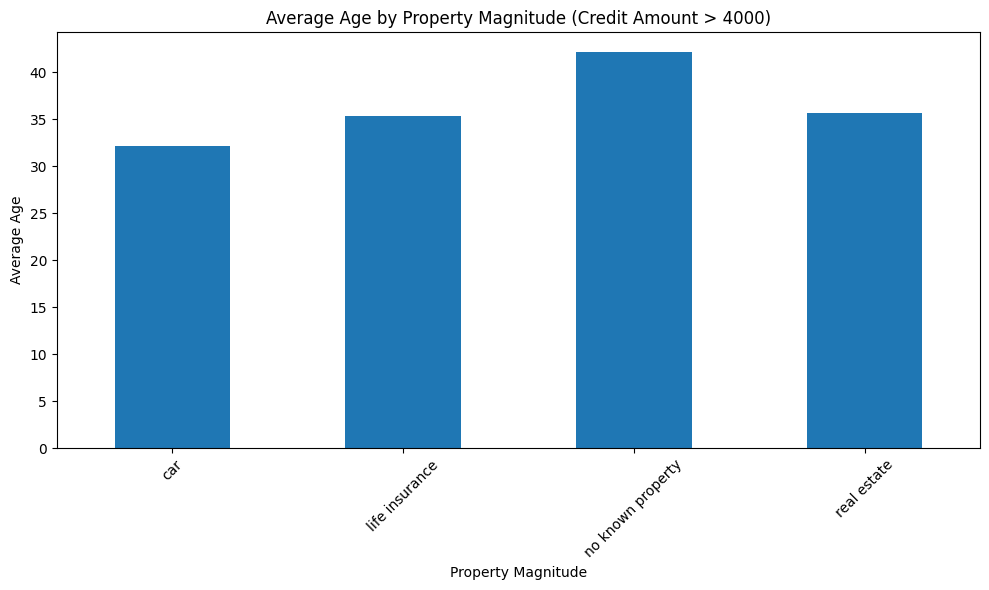

In [21]:
### CELL: 2. Bar graph — Property magnitude vs average age (credit_amount > 4000)

import matplotlib.pyplot as plt

# ensure numeric types are correct
df["credit_amount"] = pd.to_numeric(df["credit_amount"], errors="coerce")
df["age"] = pd.to_numeric(df["age"], errors="coerce")

# filter customers with credit_amount > 4000
filtered = df[df["credit_amount"] > 4000]

# compute average age for each property_magnitude category
avg_age_by_property = filtered.groupby("property_magnitude")["age"].mean()

# plot bar graph
plt.figure(figsize=(10, 6))
avg_age_by_property.plot(kind="bar")

plt.title("Average Age by Property Magnitude (Credit Amount > 4000)")
plt.xlabel("Property Magnitude")
plt.ylabel("Average Age")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
### CELL: 3. Pie charts for High savings_status & age > 40

import matplotlib.pyplot as plt

# ensure numeric age
df["age"] = pd.to_numeric(df["age"], errors="coerce")

# filter dataset
filtered = df[(df["savings_status"] == "High") & (df["age"] > 40)]

# compute value counts
ps_counts = filtered["personal_status"].value_counts()
ch_counts = filtered["credit_history"].value_counts()
job_counts = filtered["employment"].value_counts()

# prepare subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# pie 1 — Personal Status
axes[0].pie(ps_counts, labels=ps_counts.index, autopct="%1.1f%%", startangle=90)
axes[0].set_title("Personal Status")

# pie 2 — Credit History
axes[1].pie(ch_counts, labels=ch_counts.index, autopct="%1.1f%%", startangle=90)
axes[1].set_title("Credit History")

# pie 3 — Employment
axes[2].pie(job_counts, labels=job_counts.index, autopct="%1.1f%%", startangle=90)
axes[2].set_title("Employment")

plt.suptitle('Pie Charts for Customers with High Savings Status & Age > 40', fontsize=14)
plt.tight_layout()
plt.show()
